## Forecasting(Long-Term Savngs Growth)

In [429]:

import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
from prophet.plot import plot_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [430]:
df = pd.read_csv(r"C:\Users\User\Downloads\Retail_Transactions_Dataset.csv\Retail_Transactions_Dataset.csv")

In [431]:
# Drop missing values
df.dropna(inplace=True)

In [432]:
# Reset index after dropping missing values
df.reset_index(drop=True, inplace=True)

# Display first few rows of the dataset
print(df.head())

   Transaction_ID                 Date     Customer_Name  \
0      1000000001  2023-03-01 13:01:21  Michelle Carlson   
1      1000000004  2020-12-10 00:59:59    Susan Mitchell   
2      1000000005  2021-10-07 12:37:26    Joshua Frazier   
3      1000000006  2023-01-08 10:40:03  Victoria Garrett   
4      1000000007  2020-09-03 12:39:59     Sydney Waller   

                                             Product  Total_Items  Total_Cost  \
0  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
1                                      ['Dish Soap']           10       16.42   
2                          ['Toothpaste', 'Chicken']            3       72.24   
3  ['Honey', 'BBQ Sauce', 'Soda', 'Olive Oil', 'G...            4        5.28   
4  ['Syrup', 'Trash Cans', 'Pancake Mix', 'Water'...            5       21.77   

  Payment_Method           City       Store_Type  Discount_Applied  \
0           Cash  San Francisco  Specialty Store              True   
1     Debit 

In [433]:
#The dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666057 entries, 0 to 666056
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction_ID     666057 non-null  int64  
 1   Date               666057 non-null  object 
 2   Customer_Name      666057 non-null  object 
 3   Product            666057 non-null  object 
 4   Total_Items        666057 non-null  int64  
 5   Total_Cost         666057 non-null  float64
 6   Payment_Method     666057 non-null  object 
 7   City               666057 non-null  object 
 8   Store_Type         666057 non-null  object 
 9   Discount_Applied   666057 non-null  bool   
 10  Customer_Category  666057 non-null  object 
 11  Season             666057 non-null  object 
 12  Promotion          666057 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 61.6+ MB


In [434]:
# Print all current column names
print(df.columns)

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')


In [435]:
print(df)

        Transaction_ID                 Date      Customer_Name  \
0           1000000001  2023-03-01 13:01:21   Michelle Carlson   
1           1000000004  2020-12-10 00:59:59     Susan Mitchell   
2           1000000005  2021-10-07 12:37:26     Joshua Frazier   
3           1000000006  2023-01-08 10:40:03   Victoria Garrett   
4           1000000007  2020-09-03 12:39:59      Sydney Waller   
...                ...                  ...                ...   
666052      1000999993  2022-01-02 19:40:32     Donna Hamilton   
666053      1000999994  2021-03-13 14:12:17     James Villegas   
666054      1000999996  2022-05-19 05:13:58       Emily Graham   
666055      1000999998  2023-10-17 05:50:40  Michael Rodriguez   
666056      1000999999  2020-06-15 11:58:49     Jennifer Davis   

                                                  Product  Total_Items  \
0       ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2   
1                                           ['Dish Soap']  

In [436]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [437]:
# Aggregate the data by month (if needed)
df['Month'] = df['Date'].dt.to_period('M')
df_monthly = df.groupby('Month').agg({'Total_Cost': 'sum'}).reset_index()

In [438]:
# Prepare the dataframe for Prophet
df_prophet = df_monthly.rename(columns={'Month': 'ds', 'Total_Cost': 'y'})
df_prophet['ds'] = df_prophet['ds'].dt.to_timestamp()  # Convert Period to Timestamp

In [439]:
# Display the processed data
print("Processed Data:")
print(df_prophet.tail())

Processed Data:
           ds          y
48 2024-01-01  678089.72
49 2024-02-01  630481.23
50 2024-03-01  669631.15
51 2024-04-01  645977.02
52 2024-05-01  393691.86


<Axes: xlabel='ds'>

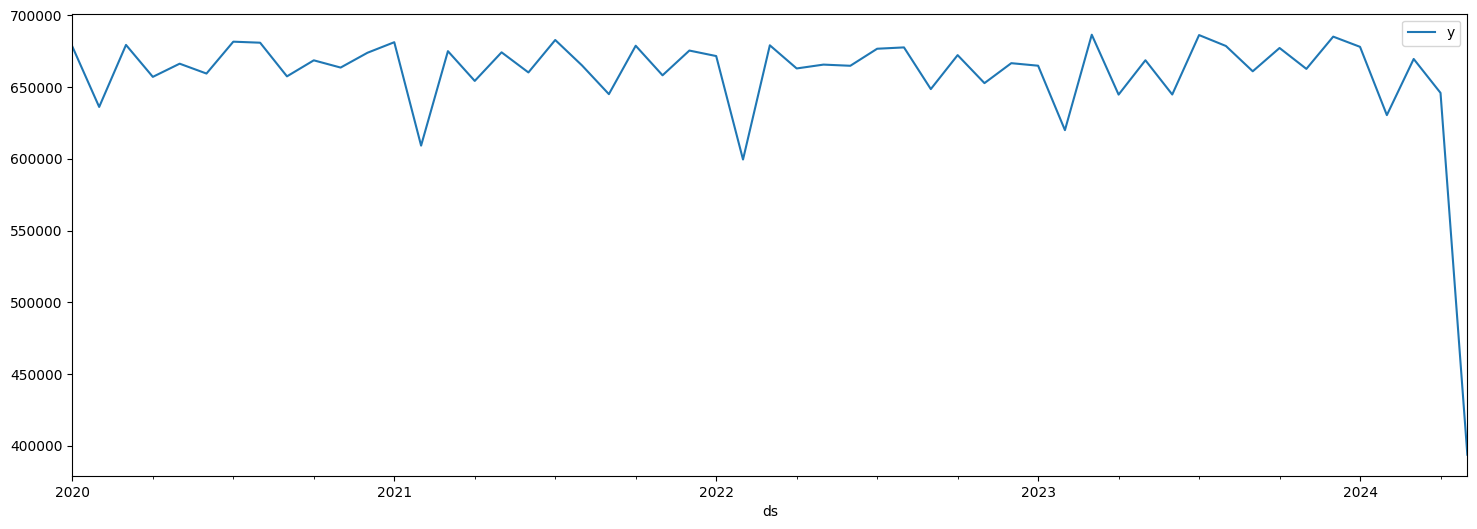

In [440]:
# Plot the time series
df_prophet.plot(x='ds', y='y', figsize=(18, 6))

In [441]:
# Split the data into training and test sets (last 12 months for testing)
train = df_prophet.iloc[:-12]
test = df_prophet.iloc[-12:]

In [442]:
# Create and fit the Prophet model
m = Prophet()
m.fit(train)

13:39:47 - cmdstanpy - INFO - Chain [1] start processing
13:39:48 - cmdstanpy - INFO - Chain [1] done processing


In [443]:
# Create future dates for prediction
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [444]:
 #Display the forecast
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
48,2023-12-31,663502.580857,640780.768152,652412.444804,662301.139951,664541.758002,-16854.783407,-16854.783407,-16854.783407,-16854.783407,-16854.783407,-16854.783407,0.0,0.0,0.0,646647.797450
49,2024-01-31,663488.858934,644092.055045,655943.902755,662077.439871,664756.417417,-13543.981129,-13543.981129,-13543.981129,-13543.981129,-13543.981129,-13543.981129,0.0,0.0,0.0,649944.877805
50,2024-02-29,663476.022296,676819.982573,688551.843333,661844.191995,664958.338256,19128.976557,19128.976557,19128.976557,19128.976557,19128.976557,19128.976557,0.0,0.0,0.0,682604.998853
51,2024-03-31,663462.300373,637717.035911,649631.179790,661590.847504,665185.332772,-19791.970392,-19791.970392,-19791.970392,-19791.970392,-19791.970392,-19791.970392,0.0,0.0,0.0,643670.329981
52,2024-04-30,663449.021093,658858.174868,671260.548062,661310.647557,665446.129460,1530.466512,1530.466512,1530.466512,1530.466512,1530.466512,1530.466512,0.0,0.0,0.0,664979.487605


C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



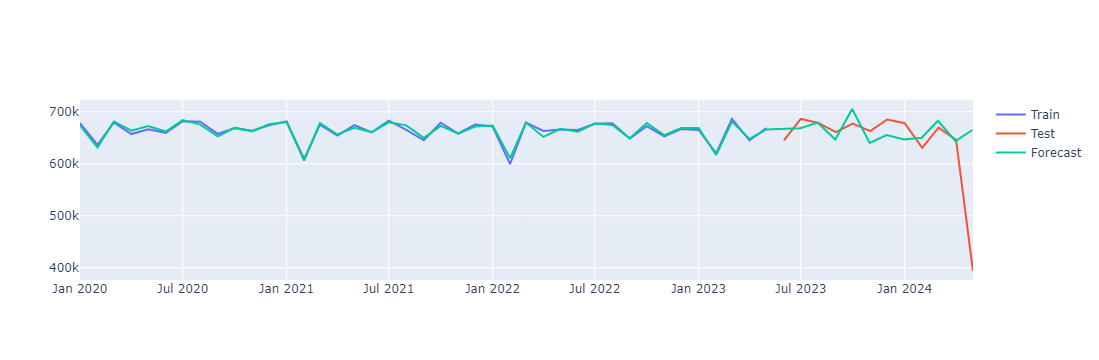

In [445]:
# Plot the forecast results
fig = go.Figure()
fig.add_trace(go.Scatter(x=train['ds'], y=train['y'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=test['ds'], y=test['y'], mode='lines', name='Test'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

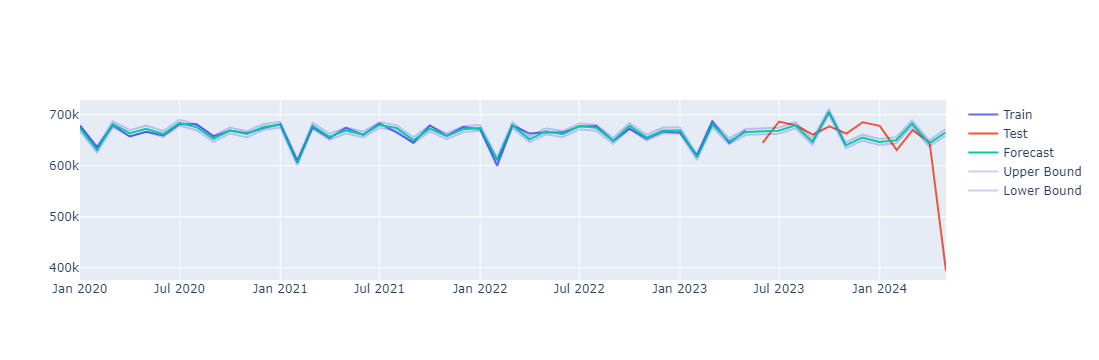

In [446]:
# Add the confidence intervals to the plot
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], mode='lines', name='Upper Bound', line=dict(color='rgba(0,0,255,0.2)')))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], mode='lines', name='Lower Bound', line=dict(color='rgba(0,0,255,0.2)')))

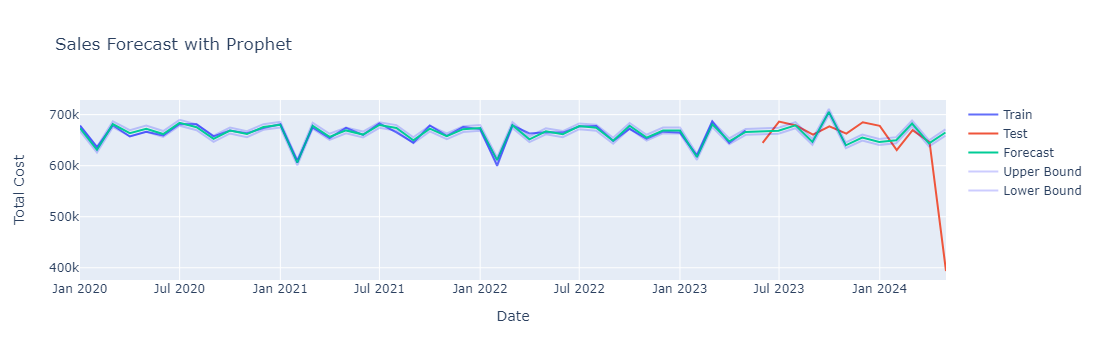

In [447]:
# Update layout
fig.update_layout(title='Sales Forecast with Prophet', xaxis_title='Date', yaxis_title='Total Cost')
fig.show()

In [448]:
# Print unique values in the ds columns
print("Unique ds values in forecast:")
print(forecast['ds'].unique())

print("\nUnique ds values in test:")
print(test['ds'].unique())


Unique ds values in forecast:
<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00',
 '2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '2023-04-01 00:00:00', '2023-05-01 00:00:00

In [449]:
# Convert 'ds' columns to datetime (if not already done)
forecast['ds'] = pd.to_datetime(forecast['ds'])
test['ds'] = pd.to_datetime(test['ds'])


# Check unique dates in both DataFrames
print("Unique dates in forecast:")
print(forecast['ds'].unique())

print("\nUnique dates in test:")
print(test['ds'].unique())


Unique dates in forecast:
<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00',
 '2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '2023-04-01 00:00:00', '2023-05-01 00:00:00', '

C:\Users\User\AppData\Local\Temp\ipykernel_5268\2476001106.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [450]:
# Find dates in forecast that are not in test
missing_in_test = forecast[~forecast['ds'].isin(test['ds'])]
print("Dates in forecast not in test:")
print(missing_in_test)

# Find dates in test that are not in forecast
missing_in_forecast = test[~test['ds'].isin(forecast['ds'])]
print("\nDates in test not in forecast:")
print(missing_in_forecast)

Dates in forecast not in test:
           ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2020-01-01  673176.823288  667555.226859  679054.113226  673176.823288   
1  2020-02-01  671544.929478  625765.461285  637235.048368  671544.929478   
2  2020-03-01  670018.319138  675494.342446  686921.891853  670018.319138   
3  2020-04-01  668389.101304  657621.182716  669704.438592  668389.101304   
4  2020-05-01  666812.438884  666639.177701  678703.266683  666812.438884   
5  2020-06-01  666616.904507  656409.514147  667887.414126  666616.904507   
6  2020-07-01  666429.823785  678365.219422  689783.668040  666429.823785   
7  2020-08-01  666236.507036  669361.221775  680958.008471  666236.507036   
8  2020-09-01  666043.190291  646543.380096  658666.057474  666043.190291   
9  2020-10-01  665856.109571  663193.459704  674798.802465  665856.109571   
10 2020-11-01  665662.792821  655943.067000  667488.077389  665662.792821   
11 2020-12-01  665475.712093  670218.815460  

In [451]:
# Merge again after checks and corrections
merged_df = forecast[['ds', 'yhat']].merge(test[['ds', 'y']], on='ds', how='inner')
print("Merged DataFrame after corrections:")
print(merged_df.head())

Merged DataFrame after corrections:
Empty DataFrame
Columns: [ds, yhat, y]
Index: []
